# Import Librarires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

Read Churn_Modeling DataSet using Pandas library. In this DataSet we have 13 independent features and one dependentent 
feature. In which we are predicting customers in the bank that who will be exit in future or not.

# Churn_Modelling DataSet

In [2]:
data = pd.read_csv("D:/DataSet/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
data.shape

(10000, 14)

In [49]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In independent features "RowNumber","CustomerId" and "Surname" are the unnecessary features.

In [3]:
X=data.iloc[:, 3:13]

In [4]:
Y = data.iloc[:, 13]

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Here, "Geography" and "Gender" are categorical. we have to convert it into numerical values using Pandas library.

In [5]:
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first=True)

In [6]:
X = pd.concat([X,geography,gender], axis=1)

Now, we drop unnecessary features

In [7]:
X = X.drop(["Geography","Gender"], axis=1)

In [8]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [45]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Train Test Split

Splitting our DataSet into training(80%) and testing(20%)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0 )
len(X_train), len(X_test), len(Y_train), len(Y_test)StandardScaler

(8000, 2000, 8000, 2000)

# Standardlization

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [30]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

# Artificial Neural Network

# Train the Data

In [14]:
model = Sequential()
#Fordward Propagation
model.add(Dense(units=6, kernel_initializer="he_uniform",activation="relu", input_dim=11))#1st hidden_layer
model.add(Dense(units=6, kernel_initializer="he_uniform",activation="relu"))#2nd hidden_layer
model.add(Dense(units=1, kernel_initializer="glorot_uniform",activation="sigmoid"))#output_layer
#Backward Propagation
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_history = model.fit(X_train, Y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 3s 2ms/step - loss: 0.6528 - accuracy: 0.6559 - val_loss: 0.4827 - val_accuracy: 0.7891
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4579 - accuracy: 0.7951 - val_loss: 0.4543 - val_accuracy: 0.7989
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4406 - accuracy: 0.8003 - val_loss: 0.4468 - val_accuracy: 0.8001
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4320 - accuracy: 0.8035 - val_loss: 0.4385 - val_accuracy: 0.8031
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4234 - accuracy: 0.8082 - val_loss: 0.4313 - val_accuracy: 0.8046
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4106 - accuracy: 0.8173 - val_loss: 0.4176 - val_accuracy: 0.8164
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3918 - accuracy: 0.8332 - val_loss: 0.4010 - val_accuracy: 0.8281

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3318 - accuracy: 0.8630 - val_loss: 0.3674 - val_accuracy: 0.8451
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3323 - accuracy: 0.8606 - val_loss: 0.3652 - val_accuracy: 0.8485
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3319 - accuracy: 0.8619 - val_loss: 0.3661 - val_accuracy: 0.8440
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3314 - accuracy: 0.8617 - val_loss: 0.3661 - val_accuracy: 0.8478
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3318 - accuracy: 0.8621 - val_loss: 0.3654 - val_accuracy: 0.8466
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3313 - accuracy: 0.8610 - val_loss: 0.3656 - val_accuracy: 0.8470
Epoch 64/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3316 - accuracy: 0.8623 - val_loss: 0.3657 - val_accuracy:

# Prediction of test data

In [21]:
Y_test_pred = model.predict(X_test)
Y_test_pred

array([[0.37443158],
       [0.309614  ],
       [0.20486054],
       ...,
       [0.2442987 ],
       [0.12381366],
       [0.17009193]], dtype=float32)

In [22]:
Y_test_pred=(Y_test_pred>0.5)

In [23]:
Y_test_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

# Accuracy

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [25]:
confusion_matrix(Y_test, Y_test_pred)

array([[1519,   76],
       [ 209,  196]], dtype=int64)

In [26]:
accuracy_score(Y_test, Y_test_pred)

0.8575

# Graphical Representation

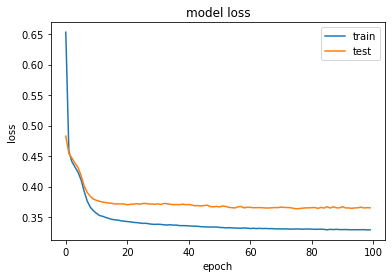

In [39]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"])
plt.show()

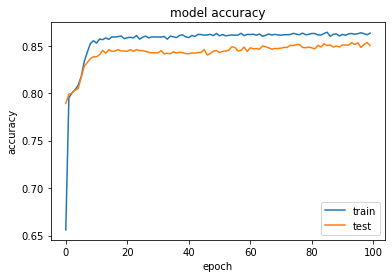

In [42]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="lower right")
plt.show()

If we have very very deep neural network basically we use Dropout